In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib.tri import Triangulation

from scipy.interpolate import griddata

import pickle

In [2]:
name = 'scan_sun_2_10152023_'

In [5]:
# AZ offset was +17

In [6]:
az_meas = np.load(name+'az_meas.npy')
el_meas = np.load(name+'el_meas.npy')
raw_samples = np.load(name+'raw_samples.npy')

In [7]:
pwrs = np.zeros(raw_samples.shape[0])
for i in range(az_meas.shape[0]):
    pwrs[i] = 10*np.log10(np.mean(np.abs(raw_samples[i])**2))

(214.28640204021505, 223.09450494754907, 34.493431670846846, 43.33634400673306)

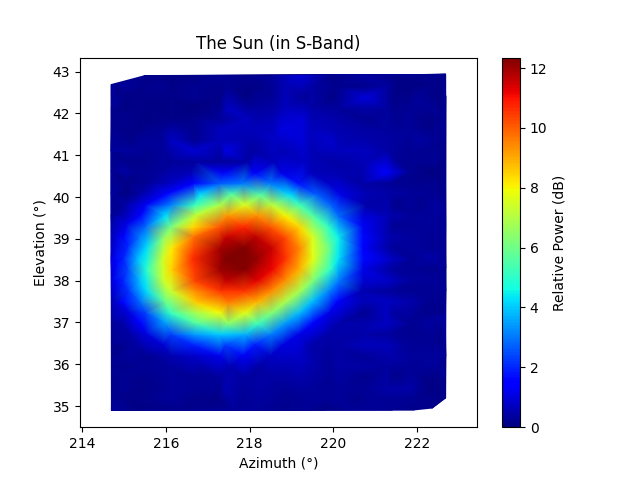

In [16]:
plt.figure()
plt.title("The Sun (in S-Band)")
plt.ylabel("Elevation (°)")
plt.xlabel("Azimuth (°)")
plt.tripcolor(az_meas, el_meas, pwrs-np.min(pwrs), shading='gouraud', cmap='jet')
plt.colorbar(label="Relative Power (dB)")
plt.axis('equal')

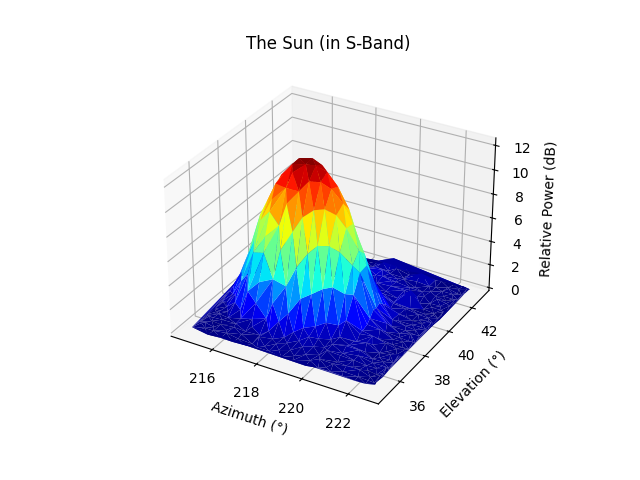

In [14]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_title("The Sun (in S-Band)")
ax.set_ylabel("Elevation (°)")
ax.set_xlabel("Azimuth (°)")
ax.set_zlabel("Relative Power (dB)")

surf = ax.plot_trisurf(az_meas, el_meas, pwrs-np.min(pwrs), antialiased=True, cmap='jet')

ax.set_aspect("equalxy")